In [1]:
import pandas as pd

In [103]:
import glob

# done for all files
list_of_images = []
allFiles = sorted(glob.glob("C:/Users/Shreyas/Desktop/CV/AU Labels/*.csv"))
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_)
    list_.append(df)
frame = pd.concat(list_)

load_labels_1_img = pd.read_csv('C:/Users/Shreyas/Desktop/CV/AU Labels/0ee17015-0ae8-4f2b-b9f1-fe8cd2de91c0-label.csv')

In [3]:
img_1_df = pd.DataFrame(load_labels_1_img)
# img_1_df

In [44]:
for col in img_1_df:
    if len(img_1_df[col].unique()) == 1:
        del img_1_df[col]
        
# img_1_df : Checks the DataFrame!

In [12]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame, Panel
pd.set_option('display.max_rows',65) # this limit maximum numbers of rows
%pylab inline

Populating the interactive namespace from numpy and matplotlib


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000268F35F0BA8>,
      dtype=object)

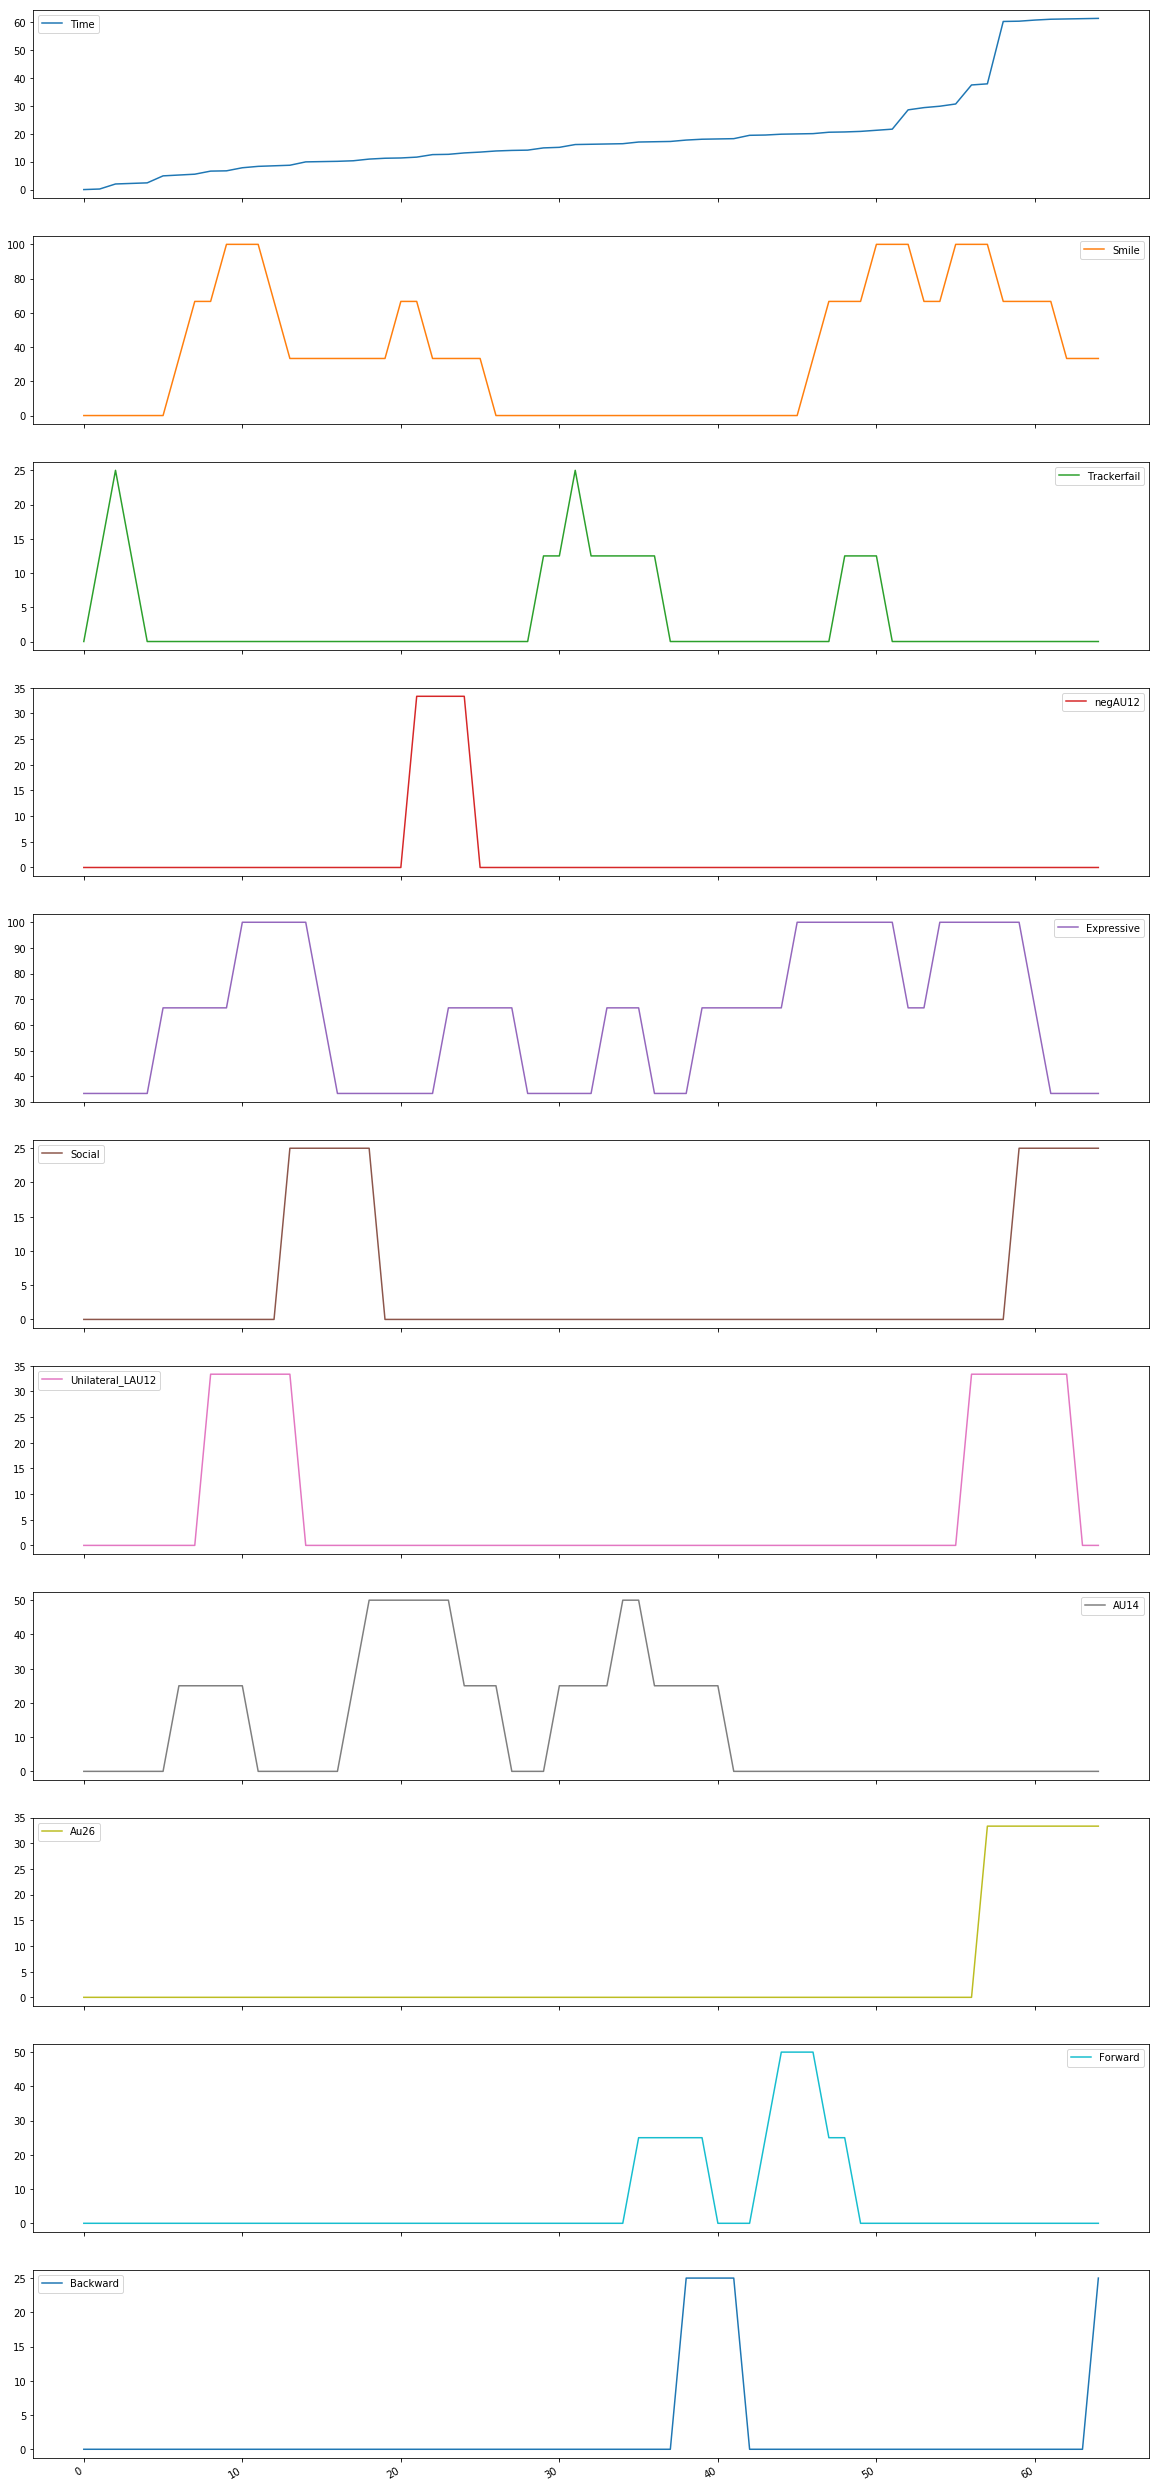

In [105]:
img_1_df.plot(figsize=(20, 50), subplots=True)

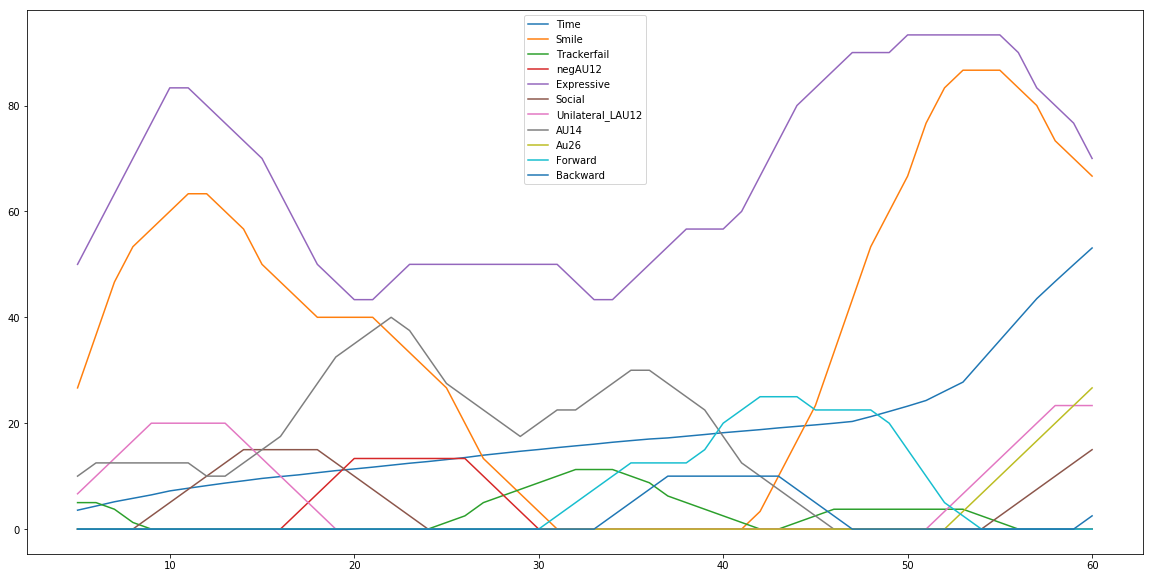

In [66]:
img_1_df.rolling(window=10, center=True).mean().plot(figsize(20, 10))

In [45]:
z = img_1_df.corr()

In [51]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

mask = np.zeros_like(z, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

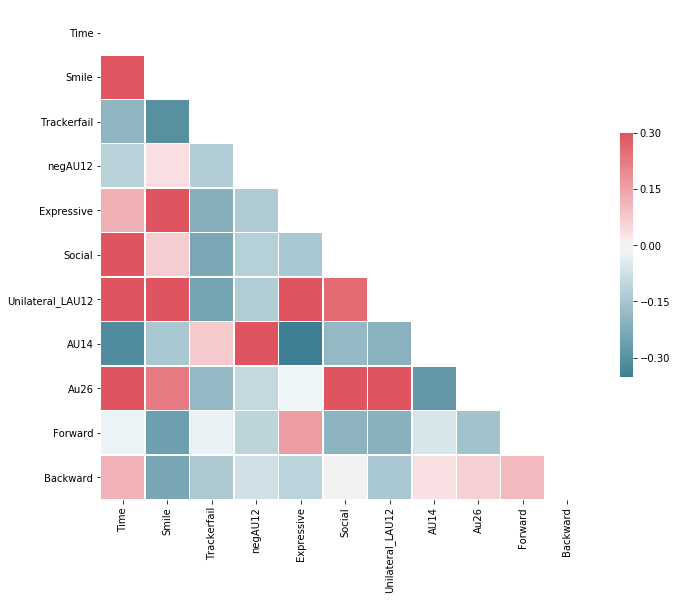

In [54]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(z, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

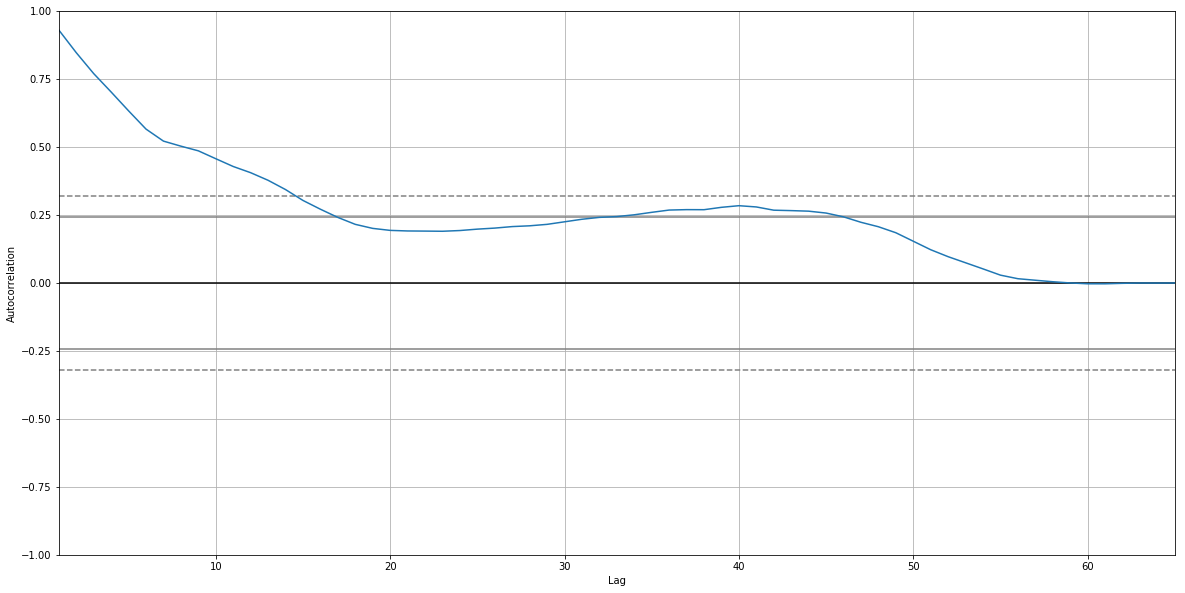

In [75]:
from pandas import Series
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(img_1_df)
pyplot.show()

Lag: 10
Coefficients: [ 3.78477279  1.14735884 -0.36302091  0.21332272  0.09373542 -0.12440731
 -0.35176155  0.17116812  0.08765694  0.28129924 -0.27632594]
predicted=97.095079, expected=100.000000
predicted=75.031532, expected=100.000000
predicted=64.950697, expected=66.667000
predicted=85.000503, expected=66.667000
predicted=87.622240, expected=66.667000
predicted=64.847465, expected=66.667000
predicted=41.192733, expected=33.333000
predicted=45.409288, expected=33.333000
predicted=60.618768, expected=33.333000
Test MSE: 262.832


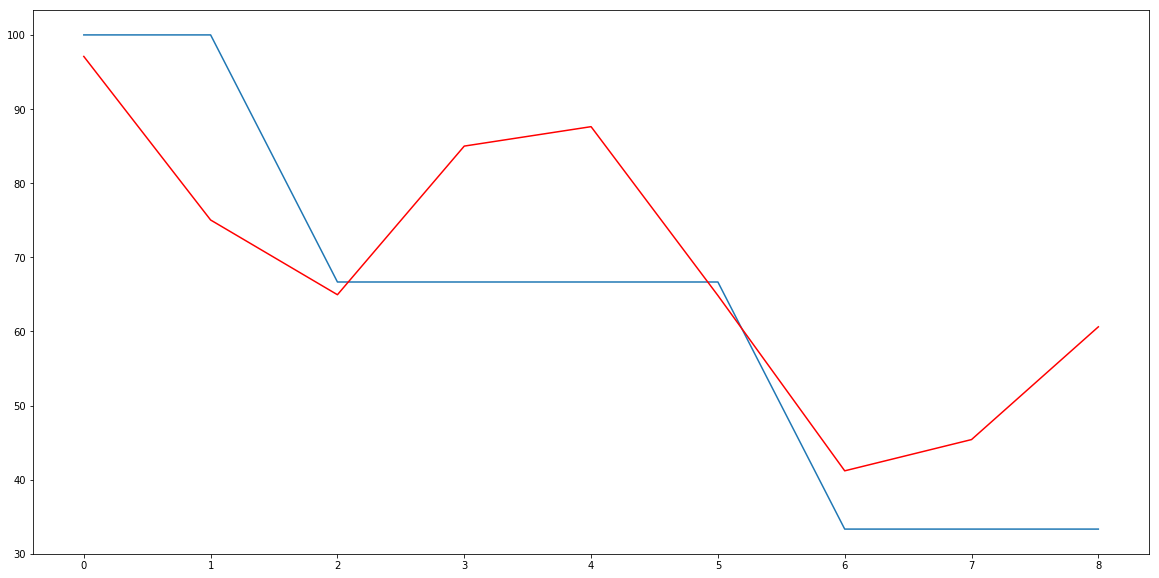

In [87]:
from pandas import Series
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error

# split dataset
X = img_1_df['Smile'].values
train, test = X[1:len(X)-9], X[len(X)-9:]


# train autoregression
model = AR(train)
model_fit = model.fit()
print('Lag: %s' % model_fit.k_ar)
print('Coefficients: %s' % model_fit.params)

# make predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))


error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)


# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [92]:
# from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(img_1_df, order=(2, 1, 0))  
# results_AR = model.fit(disp=-1)  
# plt.plot(results_AR.fittedvalues, color='red')